# Notebook to look into the Forbes list of billionaires to see what it tells us

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [2]:
# read in the data
df = pd.read_csv('forbes_2022.csv', index_col=[0])

In [3]:
# create new columns too show if these are individuals or if the source comes from multiple avenues and group ages
df['multi_people'] = df['name'].str.contains('&') | df['name'].str.contains(' and ')
df['multi_source'] = df['source'].str.contains(',')
df['age_bins'] = pd.cut(df.age,bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df.head()

,rank,name,networth,age,country,source,industry,multi_people,multi_source,age_bins
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,False,True,"(40, 50]"
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,False,False,"(50, 60]"
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,True,False,"(70, 80]"
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,False,False,"(60, 70]"
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,False,False,"(90, 100]"


# Which industry has the most billionaires

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

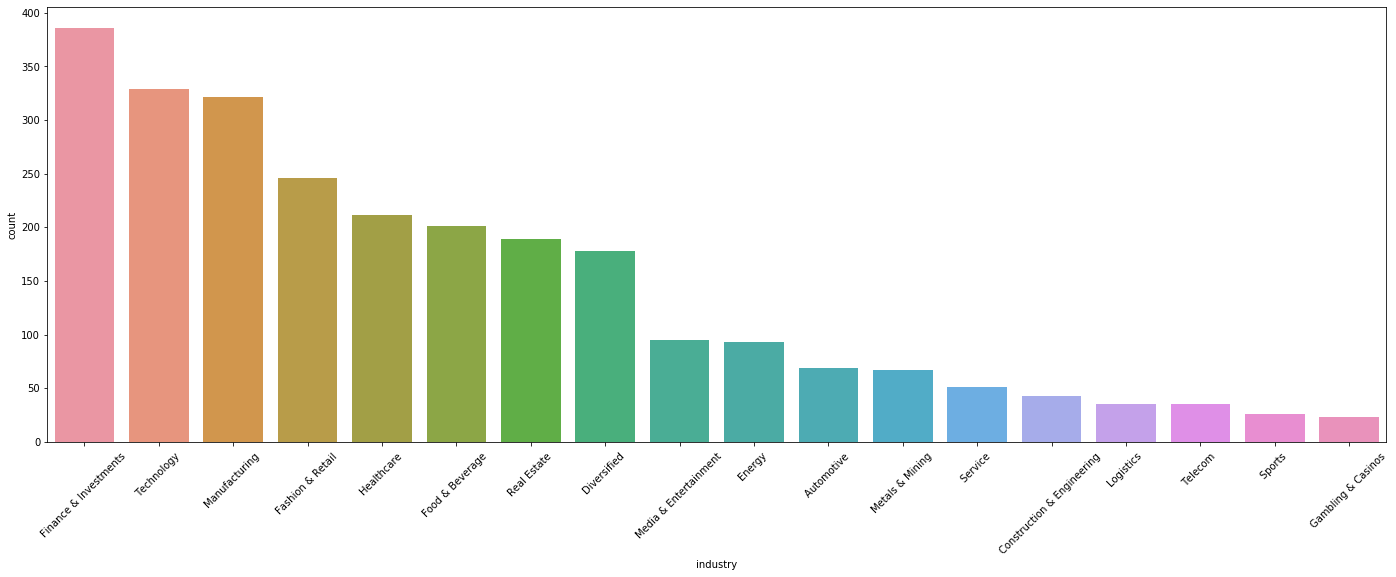

In [4]:
plt.figure(figsize=(24,8))
sns.countplot(x ='industry', data = df, order = df['industry'].value_counts().index)
plt.xticks(rotation=45)

In [5]:
max_ind = df['industry'].value_counts().idxmax()
max_num = df['industry'].value_counts().max()
print(f'The industry with the most billionaires is {max_ind}with {max_num} billionaires in this area.')

The industry with the most billionaires is Finance & Investments with 386 billionaires in this area.


# What is the age split of billionaires

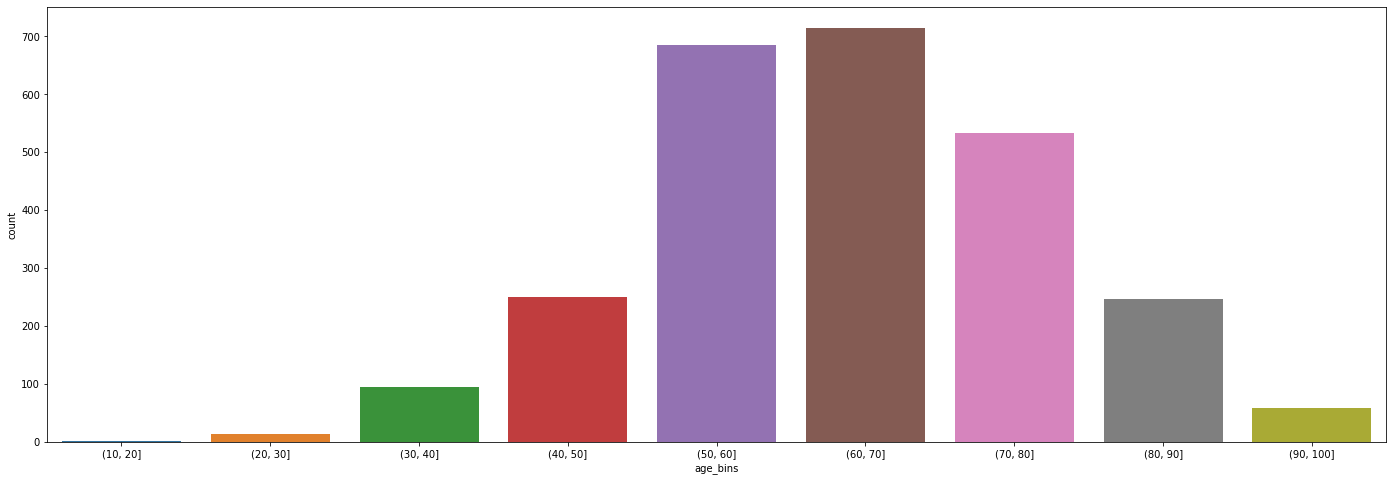

In [6]:
plt.figure(figsize=(24,8))
sns.countplot(x ='age_bins', data = df)

In [7]:
max_age = df['age'].max()
min_age = df['age'].min()
age_range = df['age_bins'].value_counts().idxmax()
print(f'The youngest billionare is {min_age} years old and the oldest is {max_age} years old.')      
print(f'Most billionaires are in the range {age_range.left} to {age_range.right} years old.')

The youngest billionare is 19 years old and the oldest is 100 years old.
Most billionaires are in the range 60 to 70 years old.


# Where are the billioniares

In [8]:
# create new columns to count where the billionaires are
country_count = df['country'].value_counts().rename_axis('country').reset_index(name='counts')
country_count['area'] = np.where(country_count['counts']<20, 'Rest of world', country_count['country'])
country_count['counts'] = np.where(country_count['area']=='Rest of world',
                country_count.area.map(lambda desc: 'Rest of world' in desc).sum(), country_count['counts'])
df = df.merge(country_count).sort_values(by=['counts'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

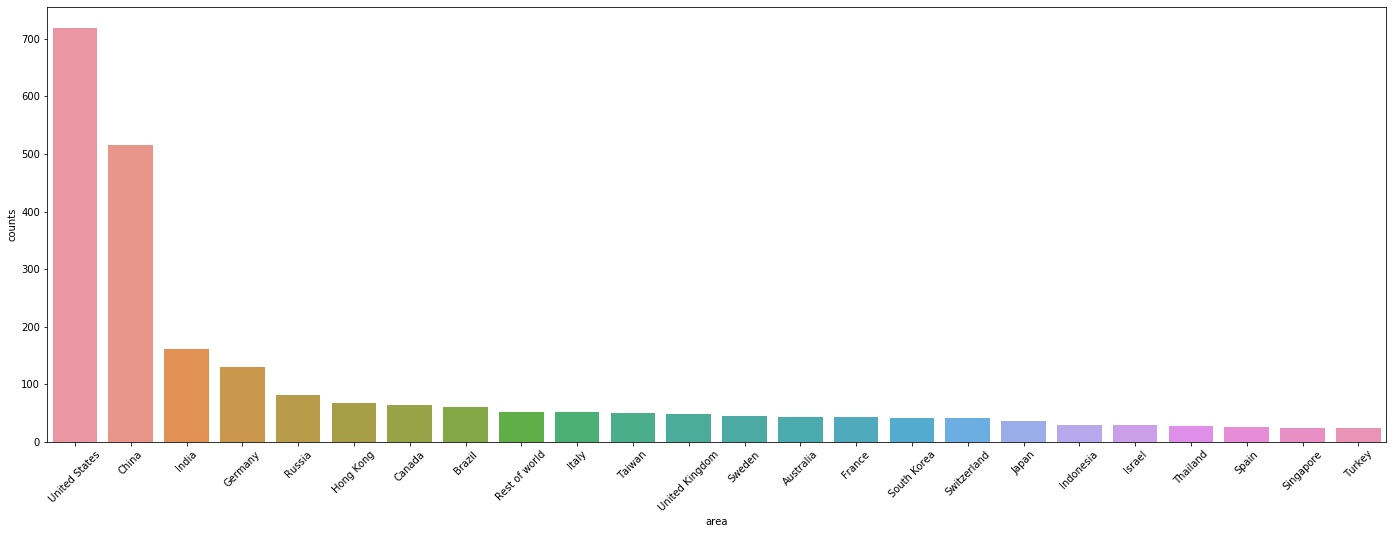

In [9]:
plt.figure(figsize=(24,8))
sns.barplot(x=df['area'], y=df['counts'])
plt.xticks(rotation=45)

In [10]:
co_max = df['country'].value_counts(normalize=True).idxmax()
co_max_perc = ((df['country'].value_counts(normalize=True).max())*100).round(1)
print(f'{co_max_perc}% of billionaires are from {co_max}.')

27.7% of billionaires are from United States.


# Are most billionaires individuals

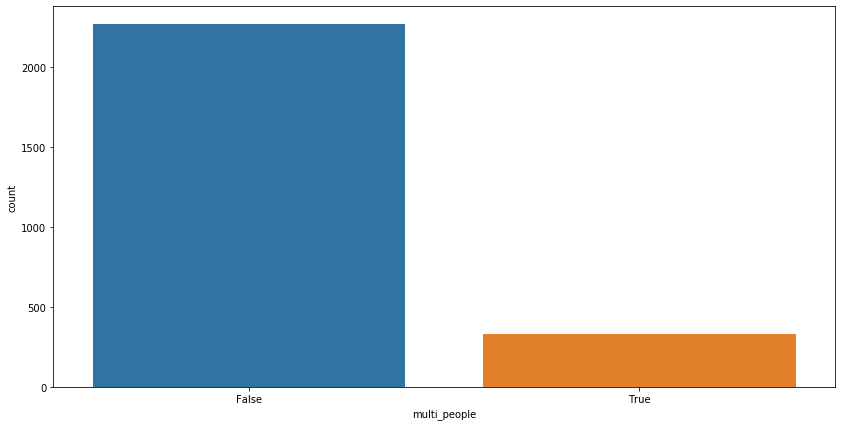

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='multi_people', data=df)

In [12]:
indiv = df['multi_people'].value_counts().idxmin()
print(f'It is {indiv} that most billionaires are individuals.')

It is True that most billionaires are individuals.


# Do most billionaires have a single source

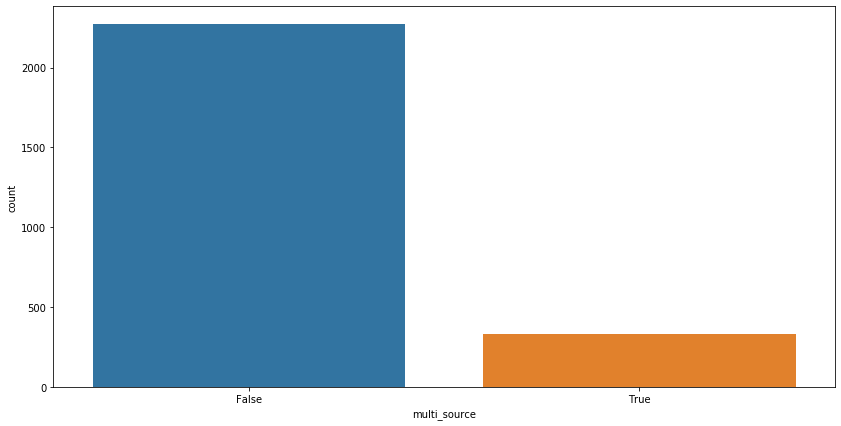

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(x='multi_source', data=df)

In [16]:
single = df['multi_source'].value_counts().idxmin()
print(f'It is {single} that most billionares have a single source.')

It is True that most billionares have a single source.
